In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("clean_tweets_1.csv")

In [4]:
import numpy as np

In [6]:
df.head()

,label,Clean_tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for credit i can't use cause they don't...
2,0,bihday your majesty
3,0,i love u take with u all the time in urd+-!!! ...
4,0,factsguide: society now


In [7]:
df.shape

(31962, 2)

In [8]:
dff = df.drop(['label'], axis = 1)

In [9]:
dff.head()

,Clean_tweet
0,when a father is dysfunctional and is so selfi...
1,thanks for credit i can't use cause they don't...
2,bihday your majesty
3,i love u take with u all the time in urd+-!!! ...
4,factsguide: society now


In [10]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Techno' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [12]:
X_test.shape

(3197, 1)

In [13]:
X_temp.shape

(28765, 1)

In [14]:
len(y_test)

3197

In [15]:
type(y_temp)

list

In [16]:
X_temp['label'] = y_temp

<ipython-input-16-696ff4fc08a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_temp['label'] = y_temp


In [17]:
X_temp.head()

,Clean_tweet,label
23685,nice inseion,0
4216,bihday mom...#bihday,0
20621,"cant wait for nxt thurs. pay .. coppers.. d1d,...",0
10670,the first mammal known to be wiped out by the ...,0
9204,if canA't u happy !!! uA'll b .............,0


In [18]:
X_temp.label[2] 

0

In [19]:
type(X_temp)

pandas.core.frame.DataFrame

In [20]:
nonhate = X_temp[X_temp['label'] == 0]

In [21]:
nonhate.head()

,Clean_tweet,label
23685,nice inseion,0
4216,bihday mom...#bihday,0
20621,"cant wait for nxt thurs. pay .. coppers.. d1d,...",0
10670,the first mammal known to be wiped out by the ...,0
9204,if canA't u happy !!! uA'll b .............,0


In [22]:
hate = X_temp[X_temp.label == 1]

In [23]:
hate.shape[0]

1994

In [24]:
nonhatesample = nonhate.sample(n = hate.shape[0])

In [25]:
nonhatesample.head()

,Clean_tweet,label
20348,dad's happy cam... gbp 16.00 get here:,0
8888,a economy to growth just 0.3%; boj likely to e...,0
17373,i am funny.,0
3253,me haces feliz. d davidcusguen a|,0
16816,dining out d' moonlight beach,0


In [26]:
nonhatesample.shape

(1994, 2)

In [27]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [28]:
ds.tail()

,Clean_tweet,label
31782,hellooood,0
7362,moved up to 2.5mm just now a! my is,0
20717,as as a tool for is !!,0
3378,buffalo simulation: buffalo for you to take in...,0
17663,always enjoy life! and be grateful for what yo...,0


In [29]:
ds.shape

(3988, 2)

In [30]:
ds.to_csv("trainset.csv")

In [31]:
ds = pd.read_csv("trainset.csv")

In [32]:
ds.head()

,Unnamed: 0,Clean_tweet,label
0,7267,why do refer to everyone else as racist. simpl...,1
1,6058,like to know why you can't buy pot at the loca...,1
2,27900,you might be a libtard if...,1
3,10187,.@user my gf used uber without forcing languag...,1
4,30425,"not all muslims are islamic extremists (very, ...",1


In [33]:
ds_temp = ds

In [34]:
testdf = X_test
testdf['label'] = y_test

<ipython-input-34-df1a4625f512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['label'] = y_test


In [35]:
testdf.shape

(3197, 2)

In [36]:
ds = pd.concat([ds_temp, testdf], axis = 0)

In [37]:
ds.head()

,Unnamed: 0,Clean_tweet,label
0,7267.0,why do refer to everyone else as racist. simpl...,1
1,6058.0,like to know why you can't buy pot at the loca...,1
2,27900.0,you might be a libtard if...,1
3,10187.0,.@user my gf used uber without forcing languag...,1
4,30425.0,"not all muslims are islamic extremists (very, ...",1


In [38]:
ds.drop("Unnamed: 0",axis=1)

,Clean_tweet,label
0,why do refer to everyone else as racist. simpl...,1
1,like to know why you can't buy pot at the loca...,1
2,you might be a libtard if...,1
3,.@user my gf used uber without forcing languag...,1
4,"not all muslims are islamic extremists (very, ...",1
...,...,...
6705,starkes in 18.06. 13:01 - 18.06. 15:00,0
82,how the uses &amp; insecurity to lure men into,1
1109,getting into the mood ready for performance of...,0
2157,harbaugh had no time for stupid questions abou...,1


In [39]:
ds.shape

(7185, 3)

In [40]:
testdf.head()

,Clean_tweet,label
16805,herbal sleep remedies that work!! !!,0
23778,gorilla simulator: you need to do to adapt to ...,0
23881,when taylor cried cuz she found her phone times,0
18523,"new on , hbo, monday, frustrated, curb your en...",0
16798,great 2 see others suppoing this totally aweso...,0


In [41]:
ds = ds.drop("Unnamed: 0",axis=1)

In [42]:
ds.head()

,Clean_tweet,label
0,why do refer to everyone else as racist. simpl...,1
1,like to know why you can't buy pot at the loca...,1
2,you might be a libtard if...,1
3,.@user my gf used uber without forcing languag...,1
4,"not all muslims are islamic extremists (very, ...",1


In [43]:
list(testdf.index)

[16805,
 23778,
 23881,
 18523,
 16798,
 31947,
 27361,
 10593,
 19322,
 12165,
 15269,
 23239,
 5571,
 19321,
 22617,
 15617,
 14255,
 7883,
 9950,
 14267,
 30735,
 3503,
 10615,
 24422,
 9631,
 8634,
 12780,
 15421,
 15450,
 24950,
 1345,
 10552,
 5118,
 20945,
 11499,
 12231,
 16468,
 7390,
 2058,
 10263,
 9135,
 8239,
 26813,
 11162,
 12002,
 5756,
 4443,
 21440,
 22445,
 20968,
 11275,
 8805,
 26106,
 12489,
 3807,
 29986,
 20910,
 12338,
 29723,
 16084,
 3254,
 7976,
 7094,
 3144,
 5354,
 24315,
 11914,
 26837,
 10473,
 13193,
 27507,
 2575,
 21017,
 17015,
 10762,
 14896,
 29450,
 3910,
 23751,
 15169,
 23949,
 4580,
 17028,
 19699,
 20466,
 13433,
 19607,
 27899,
 25712,
 24626,
 1430,
 25031,
 18489,
 16259,
 7758,
 12358,
 1852,
 9827,
 20506,
 21595,
 29348,
 26074,
 9196,
 17636,
 7970,
 20555,
 19782,
 10231,
 25216,
 20790,
 3870,
 23786,
 8359,
 16316,
 28990,
 18043,
 15955,
 19013,
 24976,
 18890,
 29161,
 30052,
 17174,
 2330,
 19820,
 24429,
 6284,
 11040,
 25367,
 3

In [44]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

In [45]:
corpus

["why do refer to everyone else as racist. simple, they're projecting their intolerance.",
 "like to know why you can't buy pot at the local drug store? marijuana unleashed at ibooks. a|",
 'you might be a libtard if...',
 '.@user my gf used uber without forcing language preferences so you are reading my data and making choices',
 'not all muslims are islamic extremists (very, very few are).',
 "is still rooted in our society's attitude towards black women's hair. read more from candide uyanze:a|",
 'is not a problem in america today. is. dumb is an equal oppounity killer of dreams.',
 "i'm guessing a shiless man doesn't objectify himself by being shiless, but a shiless woman is?",
 'more evil jew why is it jew controlled media has never and never will cite any non white groua|',
 'jokes about women penis humping girl',
 '"kevin didnat understand what head done, but he knew head fucked up." by',
 'this obviously gets on &amp; maybe two seconds after boarding - thinks he "knows" whata|'

In [46]:
cleaned_corpus = [x for x in corpus if str(x) != 'nan']

In [47]:
print(cleaned_corpus)

["why do refer to everyone else as racist. simple, they're projecting their intolerance.", "like to know why you can't buy pot at the local drug store? marijuana unleashed at ibooks. a|", 'you might be a libtard if...', '.@user my gf used uber without forcing language preferences so you are reading my data and making choices', 'not all muslims are islamic extremists (very, very few are).', "is still rooted in our society's attitude towards black women's hair. read more from candide uyanze:a|", 'is not a problem in america today. is. dumb is an equal oppounity killer of dreams.', "i'm guessing a shiless man doesn't objectify himself by being shiless, but a shiless woman is?", 'more evil jew why is it jew controlled media has never and never will cite any non white groua|', 'jokes about women penis humping girl', '"kevin didnat understand what head done, but he knew head fucked up." by', 'this obviously gets on &amp; maybe two seconds after boarding - thinks he "knows" whata|', "can't ef

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

,00,000,000001,01,039,04pm,05,05pm,06,0618a,...,zine,zionism,zit,zomg,zone,zoro,zuma,zurich,zydeco,zz
0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,0.262595,0.0,0.0,0.30162,0.0,0.0,0.0,0.0,0.538143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7163,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7164,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7165,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df2[0:7227]

,00,000,000001,01,039,04pm,05,05pm,06,0618a,...,zine,zionism,zit,zomg,zone,zoro,zuma,zurich,zydeco,zz
0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,0.262595,0.0,0.0,0.30162,0.0,0.0,0.0,0.0,0.538143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7163,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7164,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7165,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
tdf = df2
tdf['labelxyz'] = list(ds[0:len(tdf)].label)

In [52]:
tdf.tail()

,00,000,000001,01,039,04pm,05,05pm,06,0618a,...,zionism,zit,zomg,zone,zoro,zuma,zurich,zydeco,zz,labelxyz
7162,0.262595,0.0,0.0,0.30162,0.0,0.0,0.0,0.0,0.538143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7163,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7164,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7165,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7166,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [53]:
print(tdf[tdf.labelxyz == 1])

       00  000  000001   01  039  04pm   05  05pm   06  0618a  ...  zionism  \
0     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
1     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
2     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
3     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
4     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
...   ...  ...     ...  ...  ...   ...  ...   ...  ...    ...  ...      ...   
7124  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
7134  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
7145  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
7151  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   
7166  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...      0.0   

      zit  zomg  zone  zoro  zuma  zurich  zydeco  

In [54]:
tdf_hate = tdf[tdf.labelxyz == 1]
tdf_hate_new = tdf_hate
tdf_hate_new=tdf_hate_new.drop("labelxyz",axis=1)
print(tdf_hate_new)

       00  000  000001   01  039  04pm   05  05pm   06  0618a  ...  zine  \
0     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
1     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
2     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
3     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
4     0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
...   ...  ...     ...  ...  ...   ...  ...   ...  ...    ...  ...   ...   
7124  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
7134  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
7145  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
7151  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   
7166  0.0  0.0     0.0  0.0  0.0   0.0  0.0   0.0  0.0    0.0  ...   0.0   

      zionism  zit  zomg  zone  zoro  zuma  zurich  zydeco   zz  
0         0.0  0.0   

In [55]:
tdf_hate.shape

(2240, 10243)

In [56]:
tdf_nonhate = tdf[tdf.labelxyz == 0]

In [57]:
tdf_nonhate_new = tdf_nonhate
tdf_nonhate_new=tdf_nonhate_new.drop("labelxyz",axis=1)
print(tdf_nonhate_new)

            00  000  000001       01  039  04pm   05  05pm        06  0618a  \
1994  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   
1995  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   
1996  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   
1997  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   
1998  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   
...        ...  ...     ...      ...  ...   ...  ...   ...       ...    ...   
7161  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   
7162  0.262595  0.0     0.0  0.30162  0.0   0.0  0.0   0.0  0.538143    0.0   
7163  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   
7164  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   
7165  0.000000  0.0     0.0  0.00000  0.0   0.0  0.0   0.0  0.000000    0.0   

      ...  zine  zionism  zit  zomg  zone  zoro  zu

In [58]:
tdf_nonhate.shape

(4927, 10243)

In [59]:
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)

X_test_hate = tdf_hate.drop(X_train_hate.index)

X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)

X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)

In [60]:
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train_df

,00,000,000001,01,039,04pm,05,05pm,06,0618a,...,zionism,zit,zomg,zone,zoro,zuma,zurich,zydeco,zz,labelxyz
670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [61]:
X_train = X_train_df.drop(['labelxyz'], axis = 1)

y_train = list(X_train_df.labelxyz)

X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)

X_test = X_test_df.drop(['labelxyz'], axis = 1)

y_test = list(X_test_df.labelxyz)

In [62]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df2, list(ds.label), test_size=0.2)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [64]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.736058
1,Naives Bayes,0.654885


In [65]:
from sklearn.metrics import accuracy_score
nav_clf = GaussianNB()
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
accuracy_score(y_test, predict_nav)

0.7140590288797207

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_nav)

array([[2095,  832],
       [  69,  155]], dtype=int64)

In [67]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

0.7676927959377975

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_log)

array([[2250,  677],
       [  55,  169]], dtype=int64)

In [69]:
log_reg.fit(X_train, y_train)
#predict_log = log_reg.predict(X_test, threshold = 0.4)
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
#accuracy_score(y_test, predict_log)

In [70]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

In [71]:
import matplotlib.pyplot as plt

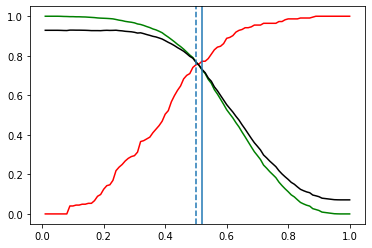

In [72]:
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.52)
plt.axvline(0.5, linestyle='dashed')

In [73]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
accuracy_score(y_test, predict)

0.7829260552205649

In [74]:
confusion_matrix(y_test, predict)

array([[2313,  614],
       [  70,  154]], dtype=int64)

In [75]:
189/(189+35)

0.84375

In [76]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
accuracy_score(y_test, predict_dt)

0.6883529038400508

In [77]:
confusion_matrix(y_test, predict_dt)

array([[2018,  909],
       [  73,  151]], dtype=int64)

In [78]:
195/224

0.8705357142857143

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
accuracy_score(y_test, predict_grad)

0.7619803237067597

In [80]:
confusion_matrix(y_test, predict_grad)

array([[2267,  660],
       [  90,  134]], dtype=int64)

In [81]:
144/224

0.6428571428571429

In [82]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))



Logistic Regression Score:  0.7615847222900093
Naive Bayes Score:  0.7038571001513008
Random Forest Score:  0.7388644516569867
Decision Tree Score:  0.6817751293376934
Grad Boosting Score:  0.6863637195568353


In [84]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

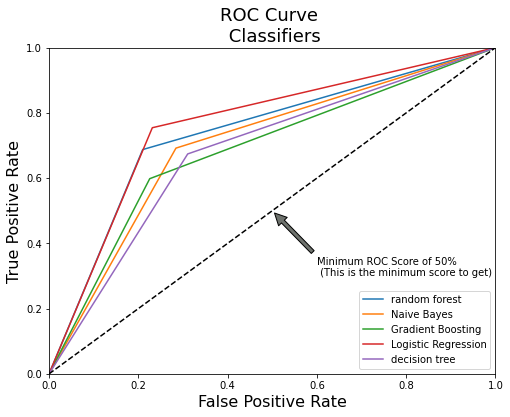

In [85]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [86]:
words = []
for k in range(len(cleaned_corpus)):
    tweet_k = cleaned_corpus[k].split(" ")
    for m in range(len(tweet_k)):
        words.append(tweet_k[m])
print(words)
from collections import Counter
counter_obj = Counter(words)
top100 = counter_obj.most_common(1000)
top100words = []
for i in range(len(top100)):
    top100words.append(top100[i][0])

['why', 'do', 'refer', 'to', 'everyone', 'else', 'as', 'racist.', 'simple,', "they're", 'projecting', 'their', 'intolerance.', 'like', 'to', 'know', 'why', 'you', "can't", 'buy', 'pot', 'at', 'the', 'local', 'drug', 'store?', 'marijuana', 'unleashed', 'at', 'ibooks.', 'a|', 'you', 'might', 'be', 'a', 'libtard', 'if...', '.@user', 'my', 'gf', 'used', 'uber', 'without', 'forcing', 'language', 'preferences', 'so', 'you', 'are', 'reading', 'my', 'data', 'and', 'making', 'choices', 'not', 'all', 'muslims', 'are', 'islamic', 'extremists', '(very,', 'very', 'few', 'are).', 'is', 'still', 'rooted', 'in', 'our', "society's", 'attitude', 'towards', 'black', "women's", 'hair.', 'read', 'more', 'from', 'candide', 'uyanze:a|', 'is', 'not', 'a', 'problem', 'in', 'america', 'today.', 'is.', 'dumb', 'is', 'an', 'equal', 'oppounity', 'killer', 'of', 'dreams.', "i'm", 'guessing', 'a', 'shiless', 'man', "doesn't", 'objectify', 'himself', 'by', 'being', 'shiless,', 'but', 'a', 'shiless', 'woman', 'is?', '

In [87]:
word_hate_level = {}
x=0
for all_words in feature_names:
    word_hate_level[all_words] = 0
hate_freqs = tdf_hate_new.values
print(len(hate_freqs)," ",hate_freqs[0:5]," ")
for hate_freq in hate_freqs:
    float_freq = hate_freq.tolist()
    x=0
    for hate_word_freq in float_freq:
        if hate_word_freq != 0:
            #print(hate_word_freq," ",x)
            try:
                word_hate_level[feature_names[x]]+=1
            except IndexError:
                print(feature_names[x]," ",hate_word_freq," ",x)
        x=x+1
#print(word_hate_level)
max_hate_key = max(word_hate_level,key=word_hate_level.get)
#word_hate_level[max_hate_key]=0
#max_hate_key = max(word_hate_level,key=word_hate_level.get)
print(word_hate_level[max_hate_key])

2240   [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]  
677


In [88]:
word_nonhate_level = {}
y=0
for all_words in feature_names:
    word_nonhate_level[all_words] = 0
nonhate_freqs = tdf_nonhate_new.values
for nonhate_freq in nonhate_freqs:
    nfloat_freq = nonhate_freq.tolist()
    y=0
    for nonhate_word_freq in nfloat_freq:
        if nonhate_word_freq != 0:
            #print(nonhate_word_freq," ",y)
            try:
                word_nonhate_level[feature_names[y]]+=1
            except IndexError:
                print(feature_names[y]," ",nonhate_word_freq," ",y)
        y=y+1
#print(word_nonhate_level)
max_nonhate_key = max(word_nonhate_level,key=word_nonhate_level.get)
#word_nonhate_level[max_nonhate_key]=0
#max_nonhate_key = max(word_nonhate_level,key=word_nonhate_level.get)
print(word_nonhate_level[max_nonhate_key])

1249


In [89]:
hate_keys, hate_values = zip(*word_hate_level.items())
nonhate_keys, nonhate_values = zip(*word_nonhate_level.items())
hate_values = list(hate_values)
nonhate_values = list(nonhate_values)
print(len(hate_keys)," ",len(hate_freqs))
temp_vals_full = []
for hate_freq in hate_freqs:
    float_freq_new = hate_freq.tolist()
    x=0
    temp_vals = []
    for hate_word_freq_new in float_freq_new:
        temp_vals.append(hate_word_freq_new*(float(hate_values[x])/float(word_hate_level[max_hate_key])))
        x+=1
    temp_vals_full.append(temp_vals)
print(len(temp_vals_full))

10242   2240
2240


In [90]:
hate_df = pd.DataFrame(temp_vals_full, columns=feature_names)
hate_df

,00,000,000001,01,039,04pm,05,05pm,06,0618a,...,zine,zionism,zit,zomg,zone,zoro,zuma,zurich,zydeco,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
print(len(nonhate_keys)," ",len(nonhate_freqs))
temp_vals_full = []
for nonhate_freq in nonhate_freqs:
    nfloat_freq_new = nonhate_freq.tolist()
    y=0
    temp_vals = []
    for nonhate_word_freq_new in nfloat_freq_new:
        temp_vals.append(nonhate_word_freq_new*(float(nonhate_values[y])/float(word_nonhate_level[max_nonhate_key])))
        y+=1
    temp_vals_full.append(temp_vals)
print(len(temp_vals_full))

10242   4927
4927


In [92]:
nonhate_df = pd.DataFrame(temp_vals_full, columns=feature_names)
nonhate_df

,00,000,000001,01,039,04pm,05,05pm,06,0618a,...,zine,zionism,zit,zomg,zone,zoro,zuma,zurich,zydeco,zz
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4923,0.002102,0.0,0.0,0.000724,0.0,0.0,0.0,0.0,0.003447,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4924,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4925,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X_train_hate_new = hate_df.sample(frac=0.9, random_state=0)

X_test_hate_new = hate_df.drop(X_train_hate_new.index)

X_train_nonhate_new =  nonhate_df.sample(frac=0.406, random_state=0)

X_test_nonhate_new = nonhate_df.drop(X_train_nonhate_new.index)

X_train_df_new = pd.concat([X_train_hate_new, X_train_nonhate_new], axis = 0)
X_train_df_new

,00,000,000001,01,039,04pm,05,05pm,06,0618a,...,zine,zionism,zit,zomg,zone,zoro,zuma,zurich,zydeco,zz
670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
X_train_new = X_train_df_new

y_train = list(X_train_df.labelxyz)

X_test_df_new = pd.concat([X_test_hate_new, X_test_nonhate_new], axis = 0)

X_test_new = X_test_df_new

y_test = list(X_test_df.labelxyz)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [99]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train_new, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train_new, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.648910
1,Naives Bayes,0.783862


In [100]:
from sklearn.metrics import accuracy_score
nav_clf = GaussianNB()
nav_clf.fit(X_train_new, y_train)
predict_nav = nav_clf.predict(X_test_new)
accuracy_score(y_test, predict_nav)

0.8460806093303713

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_nav)

array([[2486,  441],
       [  44,  180]], dtype=int64)

In [102]:
log_reg = LogisticRegression()
log_reg.fit(X_train_new, y_train)
predict_log = log_reg.predict(X_test_new)
accuracy_score(y_test, predict_log)


0.7238971754998413

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_log)

array([[2144,  783],
       [  87,  137]], dtype=int64)

In [104]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train_new, y_train)
predict = rand_clf.predict(X_test)
accuracy_score(y_test, predict)


0.806093303713107

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[2402,  525],
       [  86,  138]], dtype=int64)

In [106]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train_new, y_train)
predict_dt = dt_clf.predict(X_test_new)
accuracy_score(y_test, predict_dt)

0.8181529673119644

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_dt)

array([[2394,  533],
       [  40,  184]], dtype=int64)

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train_new, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test_new)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))

gradient boosting
0.875595049190733
[[2590  337]
 [  55  169]]


## ROC CURVE FOR MODIFIED TFIDF

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))

Logistic Regression Score:  0.7615847222900093
Naive Bayes Score:  0.8264526087168724
Random Forest Score:  0.7183534457513789
Decision Tree Score:  0.8196654302308556
Grad Boosting Score:  0.8196646676265312


In [110]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

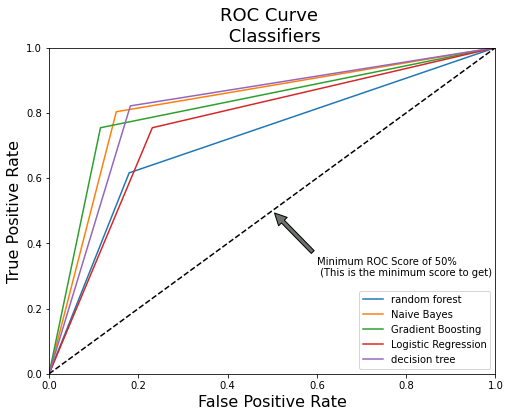

In [111]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [ ]:
tdftop = df2
lst3 = [value for value in list(tdftop.columns) if value in top100words] 
tdf100 = tdftop[lst3]
tdf100['labelxyz'] = list(ds[0:7227].label)
tdf_hate = tdf100[tdf100.labelxyz == 1]
tdf_nonhate = tdf100[tdf100.labelxyz == 0]
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
log_reg =  LogisticRegression()

log_reg.fit(X_train, y_train)
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [ ]:
plt.show()

In [ ]:
#other models
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
print('random forest')
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
print('decision tree')
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_nav))

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

In [ ]:
print(confusion_matrix(y_test, predict_log))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))

In [ ]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

In [ ]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [ ]:
#BAG Of WORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(cleaned_corpus)
bow = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())

In [ ]:
bow.head(30)

In [ ]:
bow['labelxyz'] = list(ds[0:7227].label)

In [ ]:
bow_hate = bow[bow.labelxyz == 1]
bow_nonhate = bow[bow.labelxyz == 0]
X_train_hate = bow_hate.sample(frac=0.9, random_state=0)
X_test_hate = bow_hate.drop(X_train_hate.index)
X_train_nonhate =  bow_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = bow_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [ ]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

In [ ]:
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
#plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [ ]:
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
print('random forest')
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
print('decision tree')
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_nav))

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))

In [ ]:
143/224

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

In [ ]:
print(confusion_matrix(y_test, predict_log))

In [ ]:
y_train[-1]+5

In [ ]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))


In [ ]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()